***1. Understanding of the Data***

In [1]:
#importing libraries
import pandas as pd
import seaborn as sns
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing dataset
df = pd.read_csv("C:\\Users\\338571\\Downloads\\updated_pollution_dataset_2.csv")

In [3]:
df.head()

Temperature  Humidity  PM2.5  PM10   NO2   SO2    CO  \
0         27.1      39.1    6.1   6.3  13.5   5.3  1.15   
1         26.5      70.7    6.9  16.0  21.9   5.6  1.01   
2         39.4      96.6   14.6  35.5  42.9  17.9  1.82   
3         41.7      82.5    1.7  15.8  31.1  12.7  1.80   
4         29.4      93.8   10.3  22.7  45.1  11.8  2.03   

   Proximity_to_Industrial_Areas  Population_Density Air Quality  
0                           11.1                 551        Good  
1                           12.7                 303        Good  
2                            3.1                 674        Poor  
3                            4.6                 735        Poor  
4                            5.4                 486        Poor

In [4]:
df.tail()

Temperature  Humidity  PM2.5   PM10   NO2   SO2    CO  \
4245         40.6      74.1  116.0  126.7  45.5  25.7  2.11   
4246         28.1      96.9    6.9   25.0  25.3  10.8  1.54   
4247         25.9      78.2   14.2   22.1  34.8   7.8  1.63   
4248         25.3      44.4   21.4   29.0  23.7   5.7  0.89   
4249         24.1      77.9   81.7   94.3  23.2  10.5  1.38   

      Proximity_to_Industrial_Areas  Population_Density Air Quality  
4245                            2.8                 765        Poor  
4246                            5.7                 709        Good  
4247                            9.6                 379        Good  
4248                           11.6                 241        Good  
4249                            8.3                 461        Good

In [5]:
df.shape

(4250, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    4250 non-null   float64
 1   Humidity                       4250 non-null   float64
 2   PM2.5                          4250 non-null   float64
 3   PM10                           4250 non-null   float64
 4   NO2                            4250 non-null   float64
 5   SO2                            4250 non-null   float64
 6   CO                             4250 non-null   float64
 7   Proximity_to_Industrial_Areas  4250 non-null   float64
 8   Population_Density             4250 non-null   int64  
 9   Air Quality                    4250 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 332.2+ KB


In [7]:
#Descriptive Statistics
df.describe().T

count        mean         std     min  \
Temperature                    4250.0   30.021671    7.079486   13.40   
Humidity                       4250.0   69.935576   16.402863   36.00   
PM2.5                          4250.0   20.057929   25.140063    0.00   
PM10                           4250.0   30.151482   28.294709   -0.20   
NO2                            4250.0   26.399671    9.415399    7.40   
SO2                            4250.0   10.004471    7.111211   -6.20   
CO                             4250.0    1.500428    0.586232    0.65   
Proximity_to_Industrial_Areas  4250.0    8.684212    3.778317    2.50   
Population_Density             4250.0  497.283059  158.671435  188.00   

                                   25%     50%      75%     max  
Temperature                     24.700   28.70   34.500   58.60  
Humidity                        57.800   69.60   80.200  128.10  
PM2.5                            4.500   11.60   25.600  295.00  
PM10                            11.700   21.20   37.800  315.80  
NO2                             19.500   25.00   32.500   64.90  
SO2                              4.900    7.50   14.175   44.90  
CO                               1.010    1.31    1.930    3.72  
Proximity_to_Industrial_Areas    5.225    9.70   11.300   25.80  
Population_Density             376.000  494.00  601.000  957.00

In [8]:
df.describe(include=object).T

count unique   top  freq
Air Quality  4250      2  Good  2750

**Insights from the Descriptive Statistics**

There are a total of 4250 entries with 10 columns - Air Quality being the target column - Categorical where 2750 entries have recorded good air quality.

Temperature: Wide range (13.4°C to 58.6°C) suggests diverse environmental conditions.

Humidity: High variability (36% to 128.1%) might indicate seasonal changes.

Air Quality Indicators (PM2.5, PM10, NO2, SO2, CO): Data suggests some high pollution events (e.g., PM2.5 and PM10 have very high max values).

Proximity to Industrial Areas: Distribution shows some areas are very close to industrial zones (min 2.5) while others are quite far (max 25.8).

Population Density: Varies significantly, which could affect air quality and other indicators.

***2.Data Cleaning and Preprocessing***

In [9]:
#Finding missing values
df.isnull().sum()

Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64

In [10]:
#identifying duplicate values
df.duplicated().sum()

0

No Null values and Duplicate values are present

In [11]:
print("Unique values before mapping:", df['Air Quality'].unique())

Unique values before mapping: ['Good' 'Poor']


In [12]:
#Label encoding of Air Quality 
!pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org scikit-learn
df['Air Quality'] = df['Air Quality'].map({'Good': 1, 'Poor': 0})
df.head()


[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Temperature  Humidity  PM2.5  PM10   NO2   SO2    CO  \
0         27.1      39.1    6.1   6.3  13.5   5.3  1.15   
1         26.5      70.7    6.9  16.0  21.9   5.6  1.01   
2         39.4      96.6   14.6  35.5  42.9  17.9  1.82   
3         41.7      82.5    1.7  15.8  31.1  12.7  1.80   
4         29.4      93.8   10.3  22.7  45.1  11.8  2.03   

   Proximity_to_Industrial_Areas  Population_Density  Air Quality  
0                           11.1                 551            1  
1                           12.7                 303            1  
2                            3.1                 674            0  
3                            4.6                 735            0  
4                            5.4                 486            0

Removing the negative values of parameters.

In [13]:
columns_to_check = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Proximity_to_Industrial_Areas', 'Population_Density']

#replacing negative values by clip method
df[columns_to_check] = df[columns_to_check].apply(lambda col:col.clip(lower=0))

print(df)

      Temperature  Humidity  PM2.5   PM10   NO2   SO2    CO  \
0            27.1      39.1    6.1    6.3  13.5   5.3  1.15   
1            26.5      70.7    6.9   16.0  21.9   5.6  1.01   
2            39.4      96.6   14.6   35.5  42.9  17.9  1.82   
3            41.7      82.5    1.7   15.8  31.1  12.7  1.80   
4            29.4      93.8   10.3   22.7  45.1  11.8  2.03   
...           ...       ...    ...    ...   ...   ...   ...   
4245         40.6      74.1  116.0  126.7  45.5  25.7  2.11   
4246         28.1      96.9    6.9   25.0  25.3  10.8  1.54   
4247         25.9      78.2   14.2   22.1  34.8   7.8  1.63   
4248         25.3      44.4   21.4   29.0  23.7   5.7  0.89   
4249         24.1      77.9   81.7   94.3  23.2  10.5  1.38   

      Proximity_to_Industrial_Areas  Population_Density  Air Quality  
0                              11.1                 551            1  
1                              12.7                 303            1  
2                             

Plotting Boxplot for outlier detection

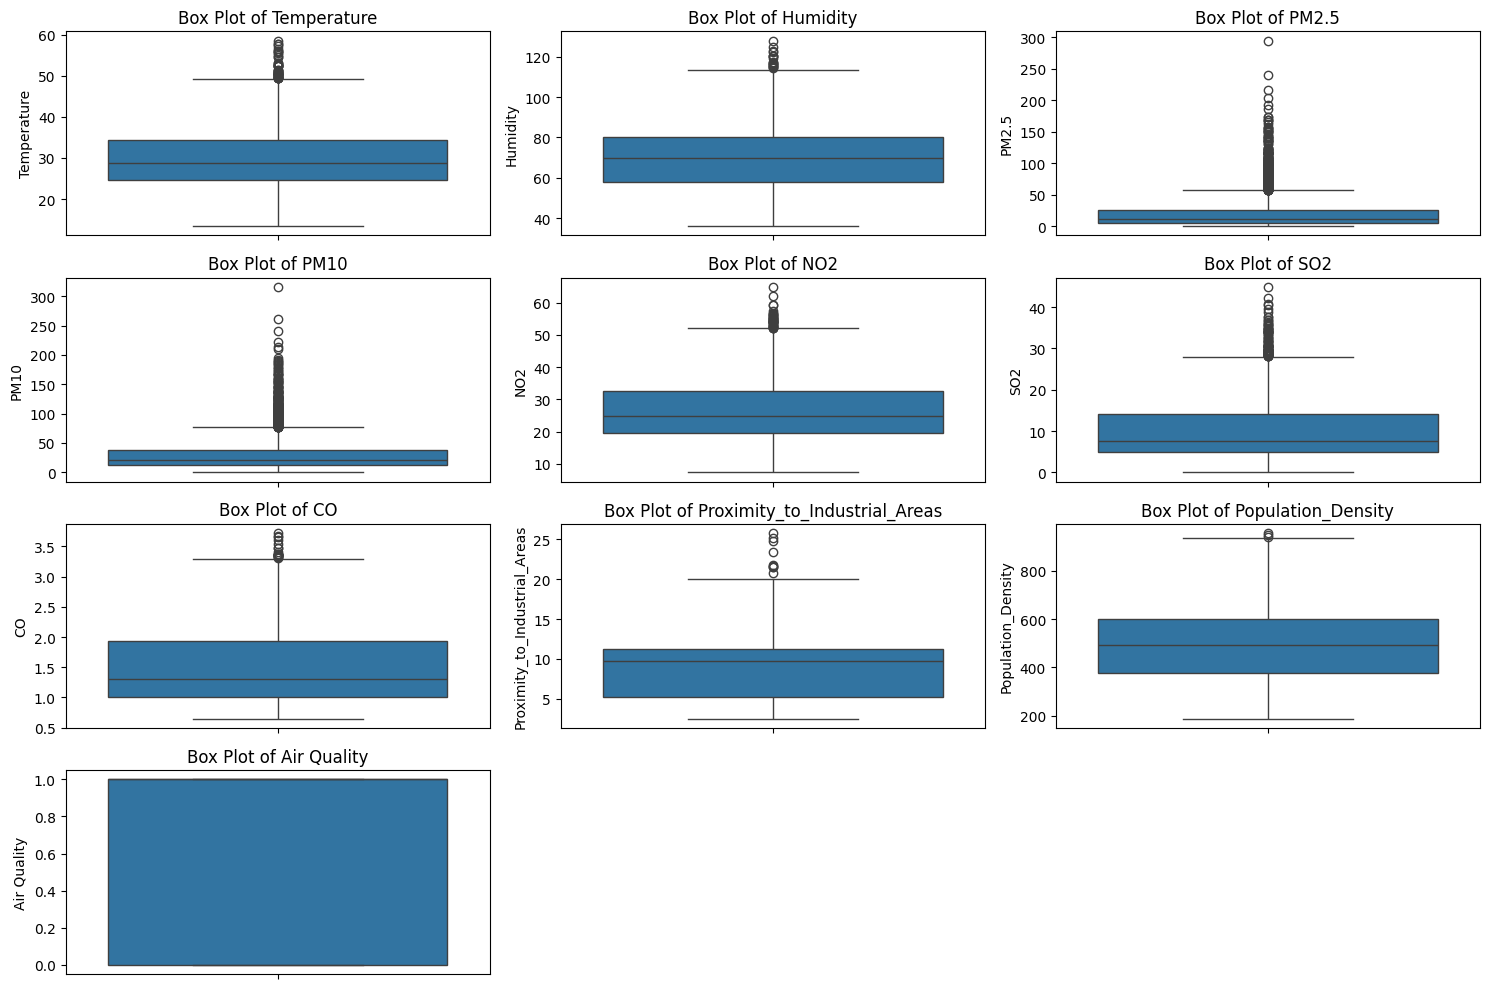

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

Since the data is Positively Skewed, Using IQR method for Outlier Detection and Transformation

In [15]:
#Outlier Identification

In [16]:
#calculation of Q1,Q3 and IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1

print("Q1:\n", Q1)
print("\nQ3:\n", Q3)
print("\nIQR:\n", IQR)

Q1:
 Temperature                       24.700
Humidity                          57.800
PM2.5                              4.500
PM10                              11.700
NO2                               19.500
SO2                                4.900
CO                                 1.010
Proximity_to_Industrial_Areas      5.225
Population_Density               376.000
Air Quality                        0.000
Name: 0.25, dtype: float64

Q3:
 Temperature                       34.500
Humidity                          80.200
PM2.5                             25.600
PM10                              37.800
NO2                               32.500
SO2                               14.175
CO                                 1.930
Proximity_to_Industrial_Areas     11.300
Population_Density               601.000
Air Quality                        1.000
Name: 0.75, dtype: float64

IQR:
 Temperature                        9.800
Humidity                          22.400
PM2.5                     

In [17]:
#Determining boundaries for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("\nLower Bound:\n", lower_bound)
print("\nUpper Bound:\n", upper_bound)


Lower Bound:
 Temperature                      10.0000
Humidity                         24.2000
PM2.5                           -27.1500
PM10                            -27.4500
NO2                               0.0000
SO2                              -9.0125
CO                               -0.3700
Proximity_to_Industrial_Areas    -3.8875
Population_Density               38.5000
Air Quality                      -1.5000
dtype: float64

Upper Bound:
 Temperature                       49.2000
Humidity                         113.8000
PM2.5                             57.2500
PM10                              76.9500
NO2                               52.0000
SO2                               28.0875
CO                                 3.3100
Proximity_to_Industrial_Areas     20.4125
Population_Density               938.5000
Air Quality                        2.5000
dtype: float64


In [18]:
#outlier identification
outlier_count = {} 
for column in df.columns: 
    lower_outliers = (df[column] < lower_bound[column]).sum() 
    upper_outliers = (df[column] > upper_bound[column]).sum() 
    total_outliers = lower_outliers + upper_outliers 
    outlier_count[column] = total_outliers 

for column, count in outlier_count.items(): 
    print(f"{column}: {count} outliers")

Temperature: 48 outliers
Humidity: 18 outliers
PM2.5: 322 outliers
PM10: 293 outliers
NO2: 36 outliers
SO2: 92 outliers
CO: 20 outliers
Proximity_to_Industrial_Areas: 9 outliers
Population_Density: 3 outliers
Air Quality: 0 outliers


In [19]:
#Cross-verfication for negative values
print("\nNegative values check:")
print((df<0).sum())


Negative values check:
Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64


Capping of the Outlier

In [20]:
for col in df.columns:
    df[col]=df[col].clip(lower=lower_bound[col],upper=upper_bound[col])

print("Dataframe after Capping:")
print(df.head())

Dataframe after Capping:
   Temperature  Humidity  PM2.5  PM10   NO2   SO2    CO  \
0         27.1      39.1    6.1   6.3  13.5   5.3  1.15   
1         26.5      70.7    6.9  16.0  21.9   5.6  1.01   
2         39.4      96.6   14.6  35.5  42.9  17.9  1.82   
3         41.7      82.5    1.7  15.8  31.1  12.7  1.80   
4         29.4      93.8   10.3  22.7  45.1  11.8  2.03   

   Proximity_to_Industrial_Areas  Population_Density  Air Quality  
0                           11.1               551.0            1  
1                           12.7               303.0            1  
2                            3.1               674.0            0  
3                            4.6               735.0            0  
4                            5.4               486.0            0  


Since the dataset is small, removal of outliers may impact the data, hence the outliers have been capped and floored to the lower bound and upper bound

In [21]:
df.shape

(4250, 10)

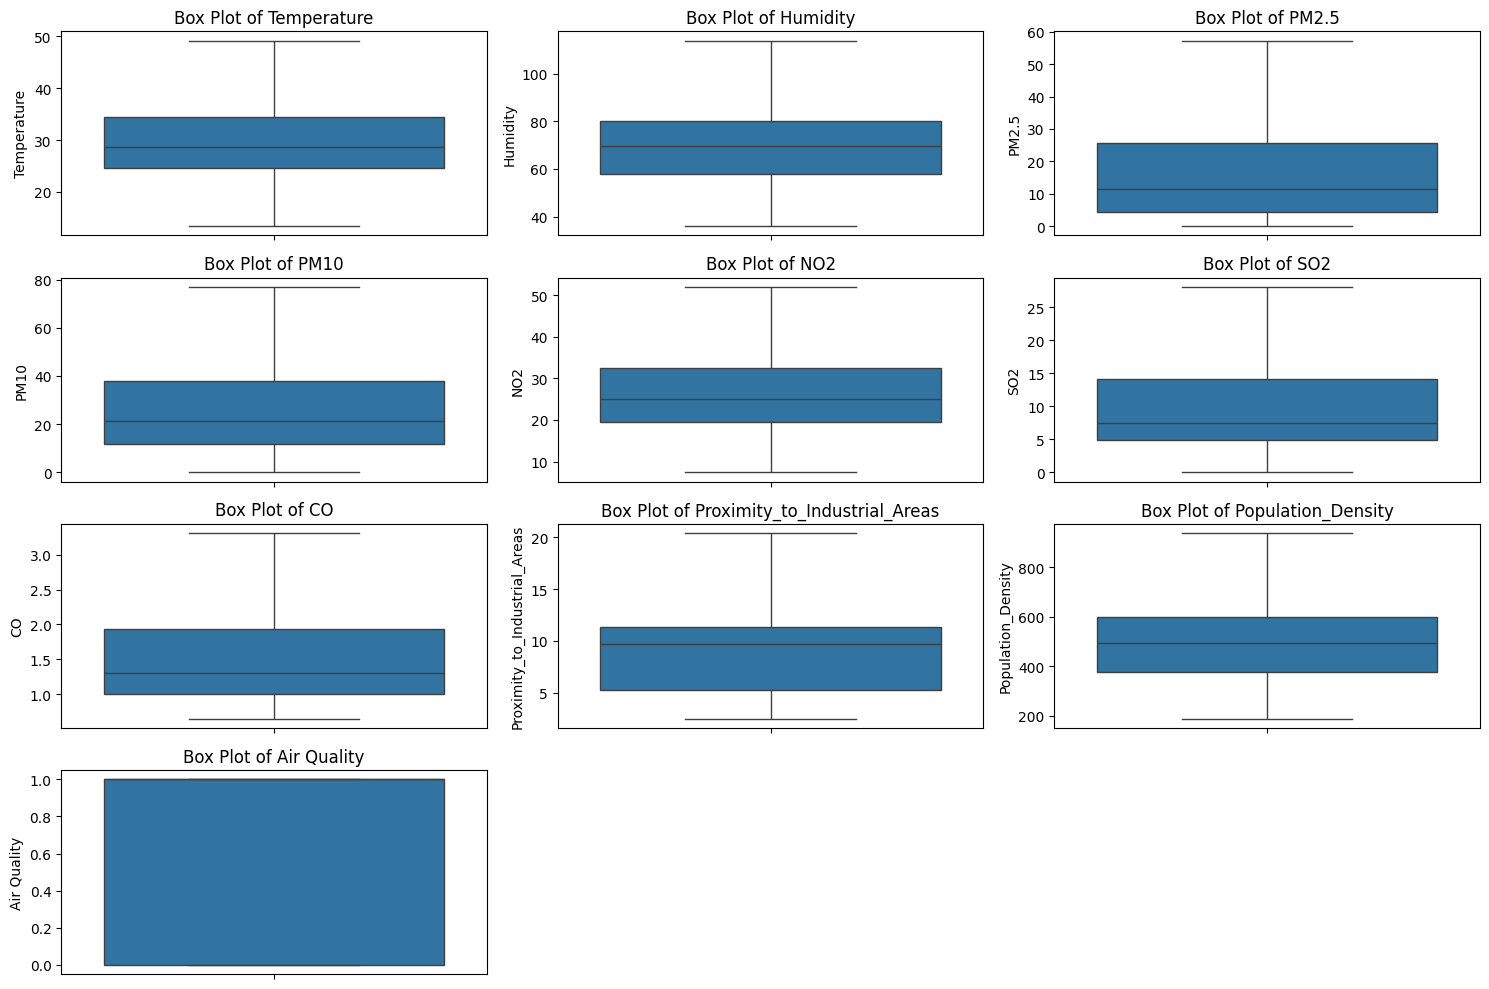

In [22]:
#verifying after outlier replacement
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()


**Insights from Data Cleaning**

The data does not contain any null values or duplicated values.
The Parameters such as CO, PM, NO2, SO2 cannot possibly contain negative values - hence the negaive values have been removed and the Outliers have been capped and floored to their respective Lower and Upper Bound. It is seen that there are no outliers present in the data.

***3.Exploratory data Analysis***

In [23]:
df.columns

Index(['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO',
       'Proximity_to_Industrial_Areas', 'Population_Density', 'Air Quality'],
      dtype='object')

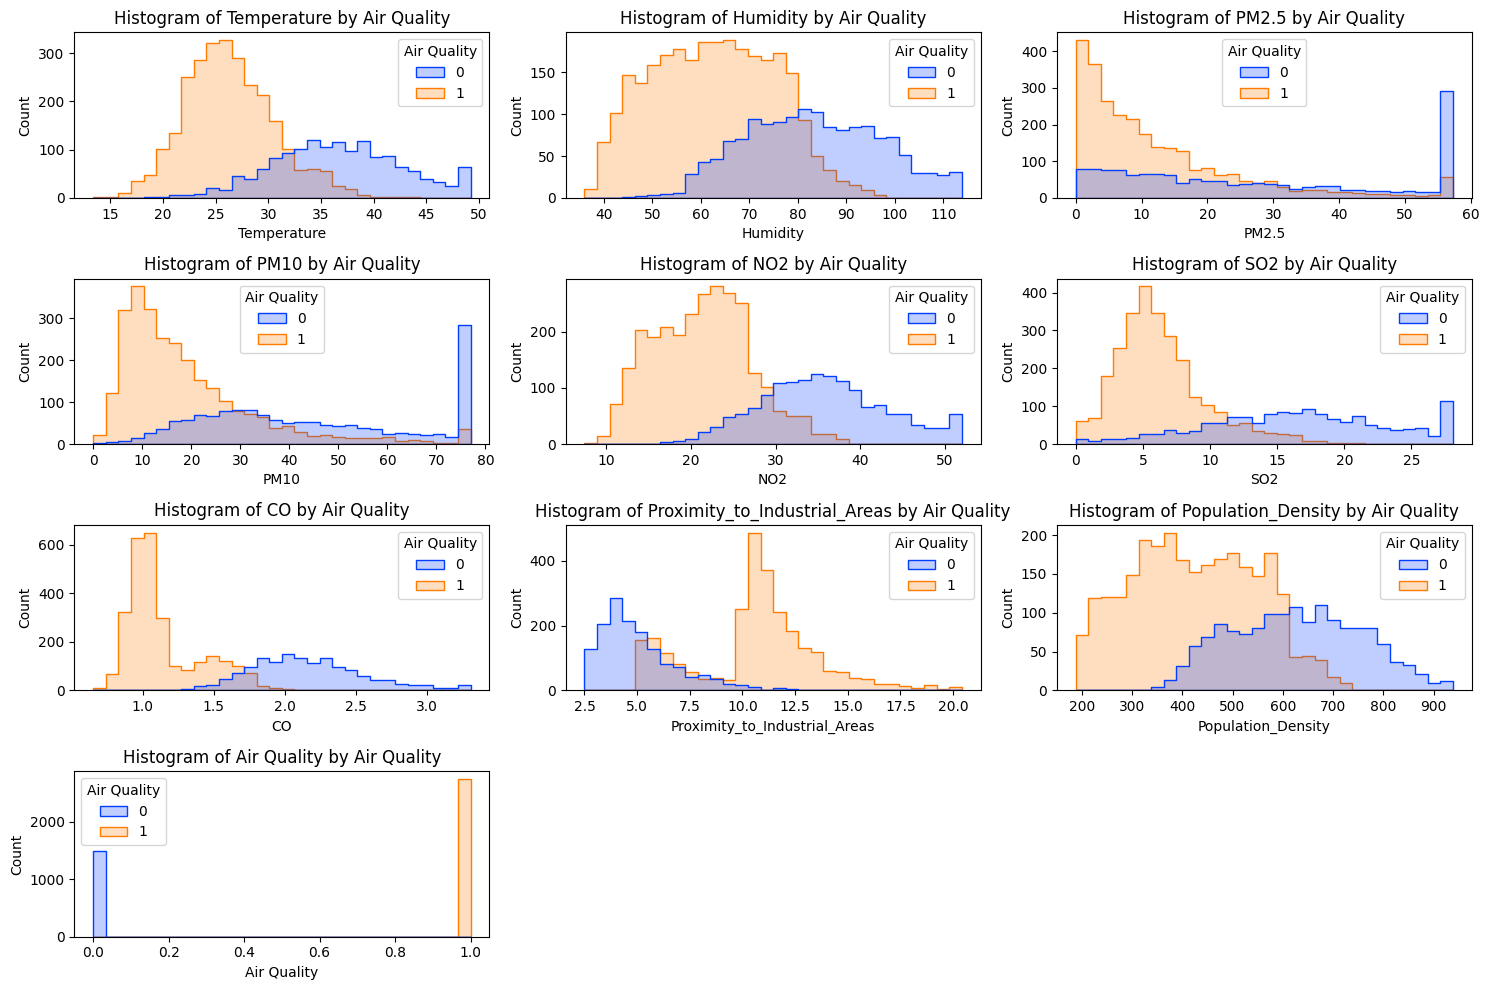

In [24]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(data=df, x=column, hue='Air Quality', bins=30, kde=False, element="step", palette="bright")
    plt.title(f'Histogram of {column} by Air Quality')
plt.tight_layout()
plt.show()


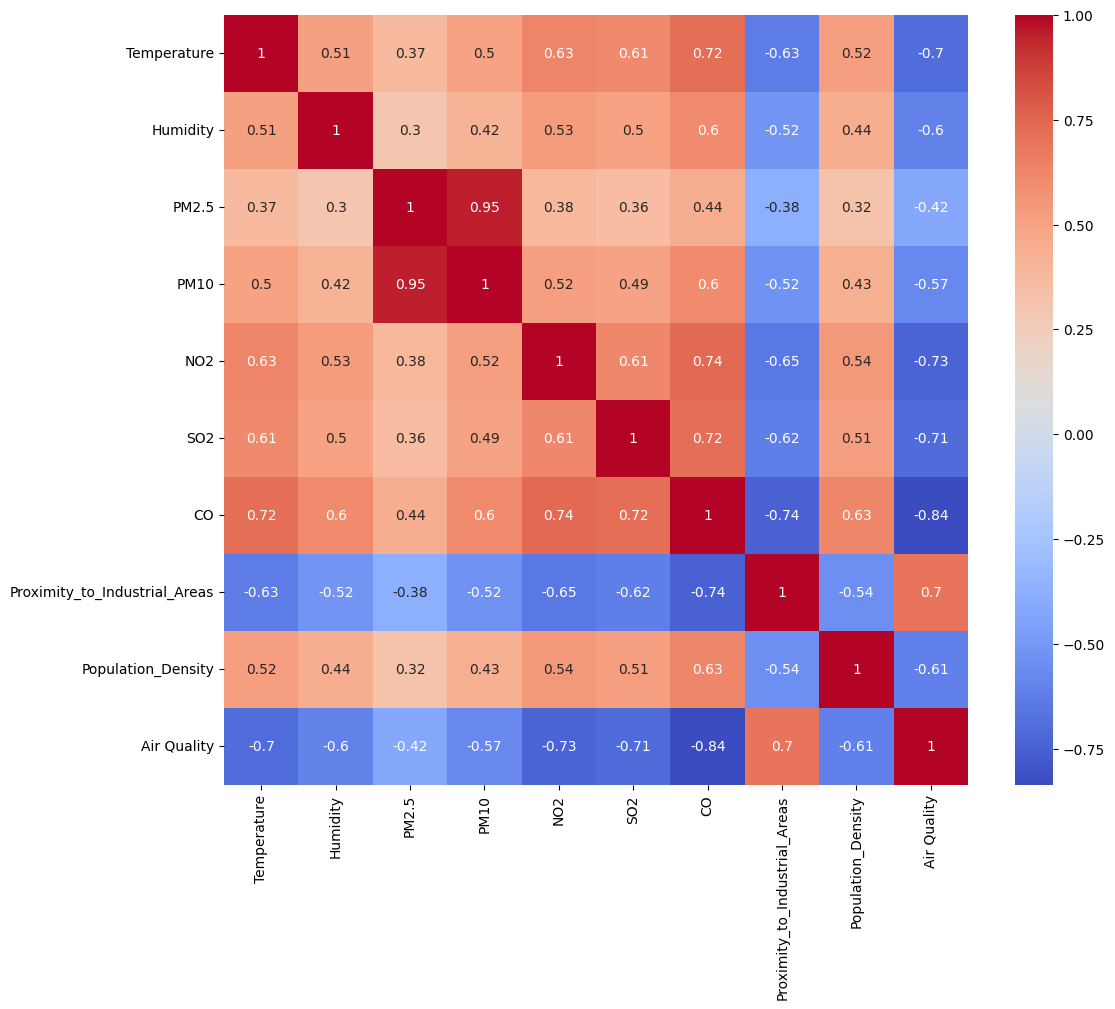

In [25]:
# Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

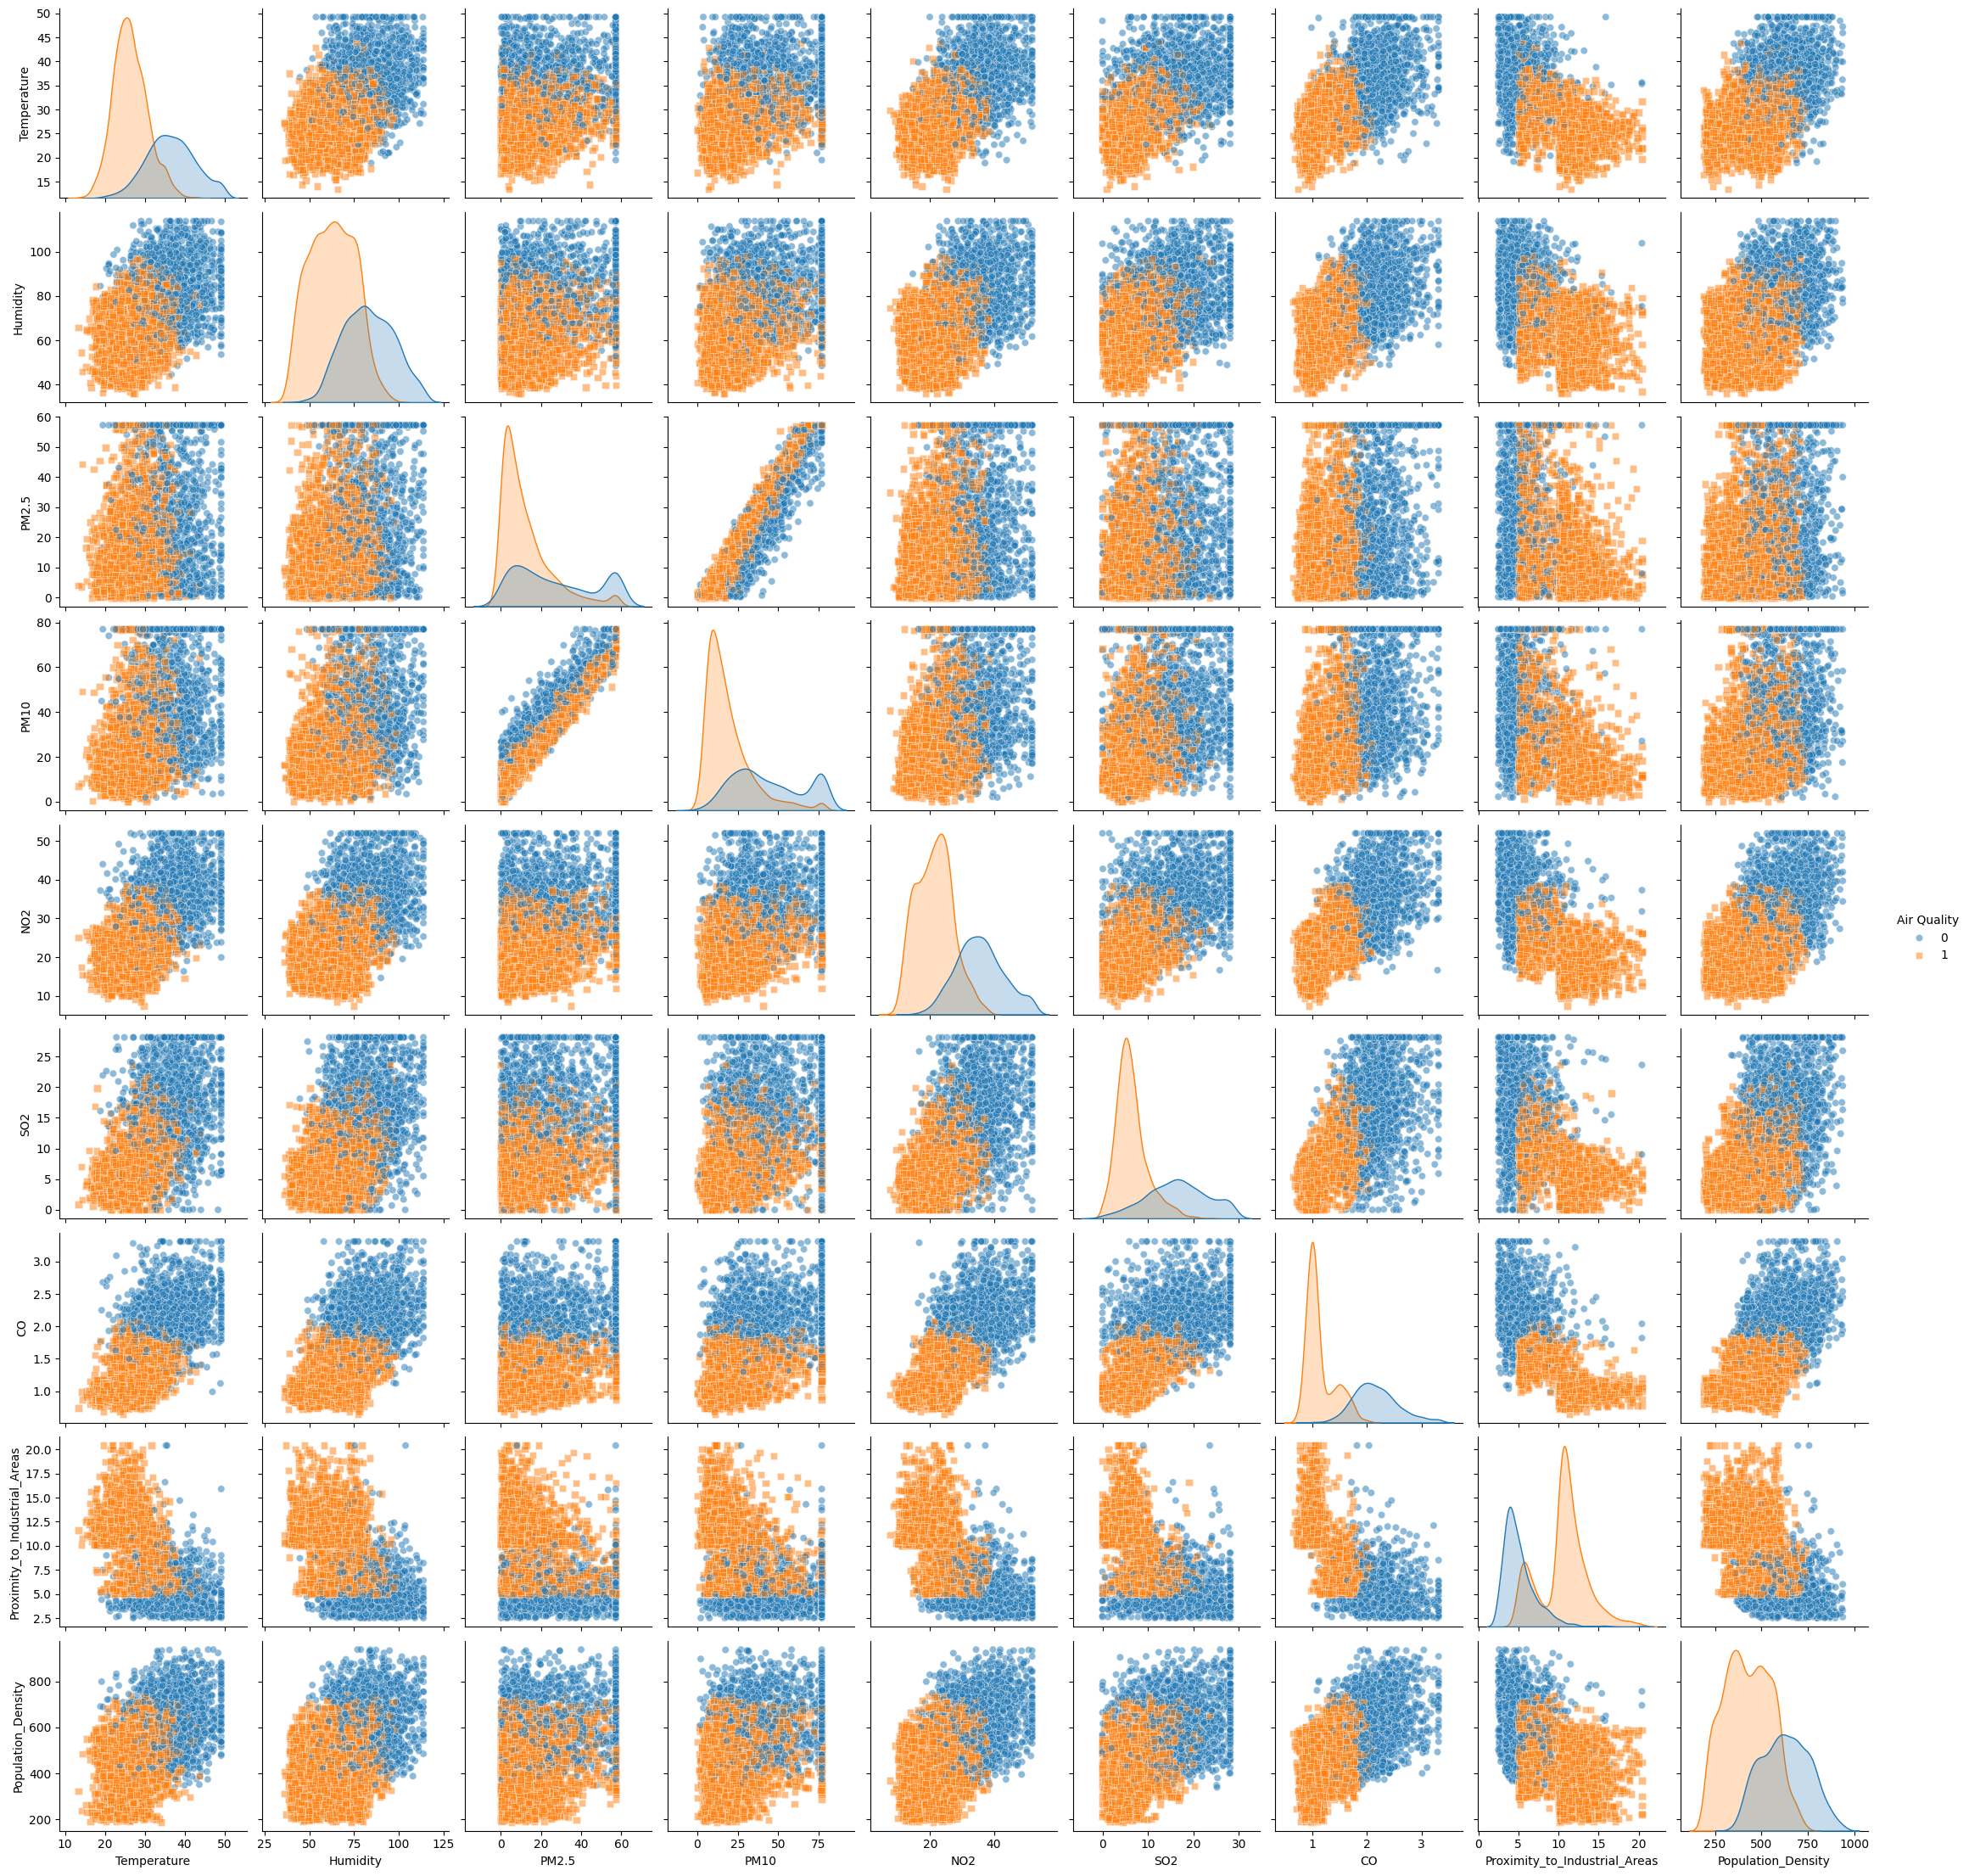

In [26]:
sns.pairplot(df, hue='Air Quality', markers=['o', 's'], plot_kws={'alpha': 0.5})
plt.show()

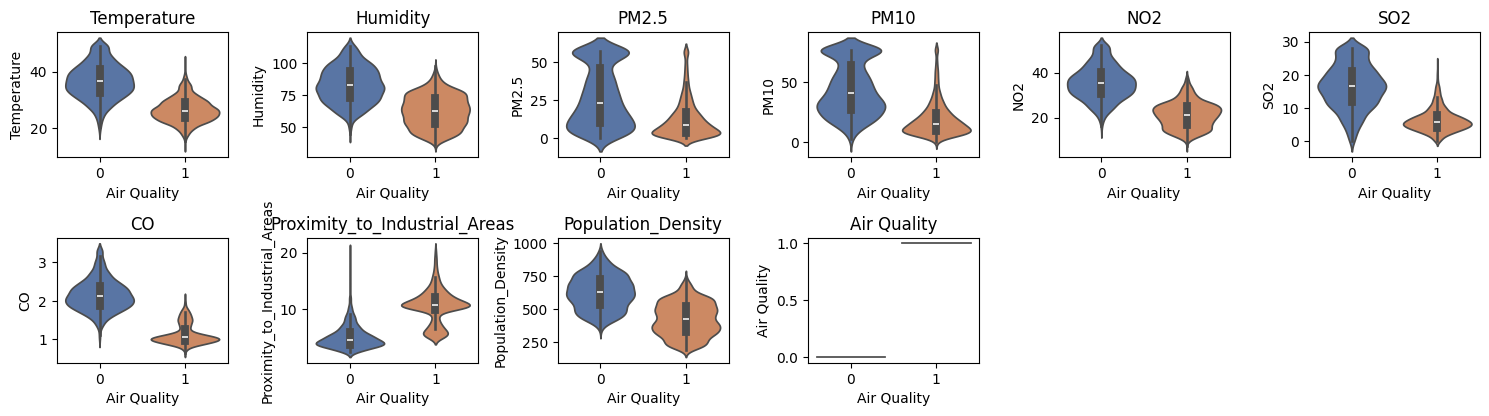

In [27]:
#violin plot
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.select_dtypes(include=[np.number]).columns, 1):
    plt.subplot(5, 6, i)
    sns.violinplot(x='Air Quality', y=col, data=df, palette='deep')
    plt.title(col)
plt.tight_layout()
plt.show()

**Insights From EDA** 

From the EDA, we can see how the distribution of Good and Poor air quality is.
Temperature, Humidity, Particle Matter, SO2,NO2, CO, Proximity and Population - Low in good and High in poor

From the Correlation Matrix, it is understood that 
(i) Proximity to industry - highly affects the air quality.
(ii)Both the particle Matter are Highly Correlated
(iii)Other Pollutants, Temperature and Humidity are Moderately correlated to each other

***4.Feature Engineering***

Skewness Correction

In [28]:
df.skew()

Temperature                      0.660296
Humidity                         0.289796
PM2.5                            1.142489
PM10                             1.062324
NO2                              0.579413
SO2                              0.980782
CO                               0.813082
Proximity_to_Industrial_Areas    0.253922
Population_Density               0.216775
Air Quality                     -0.615675
dtype: float64

In [29]:
#Multicollinearity Check
!pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org statsmodels


[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

df = pd.get_dummies(df, drop_first=True)

df = add_constant(df)

# Calculating VIF for each feature
vif_df = pd.DataFrame()
vif_df["feature"] = df.columns
vif_df["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

print(vif_df)

                          feature         VIF
0                           const  162.883781
1                     Temperature    2.367203
2                        Humidity    1.696106
3                           PM2.5   17.718271
4                            PM10   23.004868
5                             NO2    2.584697
6                             SO2    2.326355
7                              CO    5.006026
8   Proximity_to_Industrial_Areas    2.569475
9              Population_Density    1.768151
10                    Air Quality    4.322700


In [31]:
# Creating a ratio feature for PM2.5 and PM10
df['PM_Ratio'] = df['PM2.5'] / df['PM10']

df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)  

#recalculating VIF
features = ['Temperature', 'Humidity', 'PM_Ratio', 'NO2', 'SO2', 'CO', 'Proximity_to_Industrial_Areas', 'Population_Density']

# Adding a constant for VIF calculation
X = df[features].assign(Intercept=1)

vif_df = pd.DataFrame()
vif_df['Feature'] = X.columns
vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_df = vif_df[vif_df['Feature'] != 'Intercept']

print(vif_df)

                         Feature       VIF
0                    Temperature  2.297946
1                       Humidity  1.655168
2                       PM_Ratio  1.002915
3                            NO2  2.468811
4                            SO2  2.232088
5                             CO  4.173997
6  Proximity_to_Industrial_Areas  2.512018
7             Population_Density  1.737104


Feature Selection

In [32]:
#dropping const,, PM2.5 and PM10
df = df.drop(columns=['const','PM2.5', 'PM10'])

**Insights Feature Engineering**

Skewness of the data has been checked - PM 2.5 and PM 10 are with higher skweness
According to multicollinearity check, both the parameters have high VIF - hence combining both as PM_ratio and removing PM2.5 and PM10.

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [34]:
data = pd.DataFrame(df)

print(type(data))

# Split the data into features (X) and target (y)
X = data.drop(columns=['Air Quality'])
y = data['Air Quality']

print(X.head())
print(y.head())

<class 'pandas.core.frame.DataFrame'>
   Temperature  Humidity   NO2   SO2    CO  Proximity_to_Industrial_Areas  \
0         27.1      39.1  13.5   5.3  1.15                           11.1   
1         26.5      70.7  21.9   5.6  1.01                           12.7   
2         39.4      96.6  42.9  17.9  1.82                            3.1   
3         41.7      82.5  31.1  12.7  1.80                            4.6   
4         29.4      93.8  45.1  11.8  2.03                            5.4   

   Population_Density  PM_Ratio  
0               551.0  0.968254  
1               303.0  0.431250  
2               674.0  0.411268  
3               735.0  0.107595  
4               486.0  0.453744  
0    1
1    1
2    0
3    0
4    0
Name: Air Quality, dtype: int64


Stratification of train and test data

In [35]:
# Determine the valid number of components
n_features = X.shape[1]
n_samples = X.shape[0]
max_components = min(n_features, n_samples) - 1

print(f'Maximum number of components that can be used: {max_components}')

Maximum number of components that can be used: 7


In [36]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from tabulate import tabulate

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Storing distributions and standardized data
distributions = []
X_train_pca_list = []
X_test_pca_list = []
y_train_list = []
y_test_list = []

# Performing stratified k-fold split
for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Standardization
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # PCA
    pca = PCA(n_components=7)  # Adjust the number of components as needed
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    
    # Storing standardized and PCA-transformed data
    X_train_pca_list.append(X_train_pca)
    X_test_pca_list.append(X_test_pca)
    y_train_list.append(y_train)
    y_test_list.append(y_test)
    
    # Storing distribution
    train_dist = y_train.value_counts(normalize=True).to_dict()
    test_dist = y_test.value_counts(normalize=True).to_dict()
    distributions.append([fold, train_dist, test_dist])

# Creating a DataFrame for the distributions
df_distributions = pd.DataFrame(distributions, columns=['Fold', 'Train Set Distribution', 'Test Set Distribution'])

# Tabulating the results
table = tabulate(df_distributions, headers='keys', tablefmt='pretty', showindex=False)
print(table)

# Checking the shape of the standardized and PCA-transformed data for each fold
for fold in range(len(X_train_pca_list)):
    print(f"Fold {fold+1} - Train PCA shape: {X_train_pca_list[fold].shape}, Test PCA shape: {X_test_pca_list[fold].shape}")


+------+------------------------------------------------+-------------------------------------------------+
| Fold |             Train Set Distribution             |              Test Set Distribution              |
+------+------------------------------------------------+-------------------------------------------------+
|  1   | {1: 0.6468510888758093, 0: 0.3531489111241907} | {1: 0.6470588235294118, 0: 0.35294117647058826} |
|  2   | {1: 0.6468510888758093, 0: 0.3531489111241907} | {1: 0.6470588235294118, 0: 0.35294117647058826} |
|  3   | {1: 0.6468510888758093, 0: 0.3531489111241907} | {1: 0.6470588235294118, 0: 0.35294117647058826} |
|  4   |  {1: 0.646954986760812, 0: 0.353045013239188}  | {1: 0.6466431095406361, 0: 0.35335689045936397} |
|  5   |  {1: 0.646954986760812, 0: 0.353045013239188}  | {1: 0.6466431095406361, 0: 0.35335689045936397} |
+------+------------------------------------------------+-------------------------------------------------+
Fold 1 - Train PCA shape: (3

In [37]:
# Assuming you have done PCA already
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Print explained variance details
print("Explained Variance Ratio for Each Principal Component:")
for i, (expl_var, cum_var) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance), 1):
    print(f"Principal Component {i}: Individual Explained Variance = {expl_var:.4f}, Cumulative Explained Variance = {cum_var:.4f}")

Explained Variance Ratio for Each Principal Component:
Principal Component 1: Individual Explained Variance = 0.5739, Cumulative Explained Variance = 0.5739
Principal Component 2: Individual Explained Variance = 0.1252, Cumulative Explained Variance = 0.6991
Principal Component 3: Individual Explained Variance = 0.0708, Cumulative Explained Variance = 0.7700
Principal Component 4: Individual Explained Variance = 0.0660, Cumulative Explained Variance = 0.8360
Principal Component 5: Individual Explained Variance = 0.0486, Cumulative Explained Variance = 0.8846
Principal Component 6: Individual Explained Variance = 0.0472, Cumulative Explained Variance = 0.9318
Principal Component 7: Individual Explained Variance = 0.0439, Cumulative Explained Variance = 0.9757


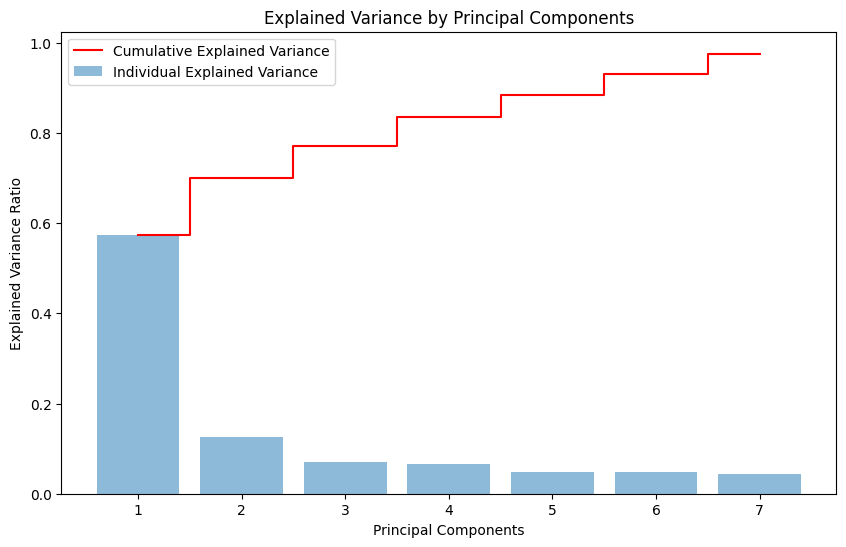

In [38]:
import matplotlib.pyplot as plt

# Plotting the explained variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center', label='Individual Explained Variance')
plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, where='mid', label='Cumulative Explained Variance', color='red')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.legend(loc='best')
plt.show()

the data has been Standardized, stratified and Feature selection using PCA has been done. 7 important features are selected and the data is ready for model building.

***5.Model Building***

In [39]:
print("Data type of y:", y.dtype) 
print("Unique values in y:", y.unique())

Data type of y: int64
Unique values in y: [1 0]


In [40]:
y = y.astype(int)

In [41]:
from sklearn.metrics import  accuracy_score,confusion_matrix,classification_report

Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss, confusion_matrix

# Assuming you have already run the PCA and stored the values in these lists:
# X_train_pca_list, X_test_pca_list, y_train_list, y_test_list

# Storing results
results = []

# Perform model training and evaluation for each fold
for fold, (X_train_pca, X_test_pca, y_train, y_test) in enumerate(zip(X_train_pca_list, X_test_pca_list, y_train_list, y_test_list), 1):
    # Model initialization
    logreg = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=1000)
    
    # Fit the model
    logreg.fit(X_train_pca, y_train)
    
    # Predictions on test data
    y_pred_logreg_test = logreg.predict(X_test_pca)
    y_pred_proba_logreg_test = logreg.predict_proba(X_test_pca)
    
    # Predictions on train data
    y_pred_logreg_train = logreg.predict(X_train_pca)
    y_pred_proba_logreg_train = logreg.predict_proba(X_train_pca)
    
    # Evaluation on test data
    logreg_accuracy_test = accuracy_score(y_test, y_pred_logreg_test)
    logreg_precision_test = precision_score(y_test, y_pred_logreg_test, average='macro')
    logreg_recall_test = recall_score(y_test, y_pred_logreg_test, average='macro')
    logreg_f1_test = f1_score(y_test, y_pred_logreg_test, average='macro')
    logreg_roc_auc_test = roc_auc_score(y_test, y_pred_proba_logreg_test[:, 1])
    logreg_logloss_test = log_loss(y_test, y_pred_proba_logreg_test)
    logreg_conf_matrix_test = confusion_matrix(y_test, y_pred_logreg_test)
    
    # Evaluation on train data
    logreg_accuracy_train = accuracy_score(y_train, y_pred_logreg_train)
    logreg_precision_train = precision_score(y_train, y_pred_logreg_train, average='macro')
    logreg_recall_train = recall_score(y_train, y_pred_logreg_train, average='macro')
    logreg_f1_train = f1_score(y_train, y_pred_logreg_train, average='macro')
    logreg_roc_auc_train = roc_auc_score(y_train, y_pred_proba_logreg_train[:, 1])
    logreg_logloss_train = log_loss(y_train, y_pred_proba_logreg_train)
    logreg_conf_matrix_train = confusion_matrix(y_train, y_pred_logreg_train)
    
    # Store results
    results.append([fold, logreg_accuracy_test, logreg_precision_test, logreg_recall_test, logreg_f1_test, logreg_roc_auc_test, logreg_logloss_test, logreg_conf_matrix_test,
                    logreg_accuracy_train, logreg_precision_train, logreg_recall_train, logreg_f1_train, logreg_roc_auc_train, logreg_logloss_train, logreg_conf_matrix_train])

# Create a DataFrame for the results
df_results = pd.DataFrame(results, columns=['Fold', 'Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1 Score', 'Test ROC-AUC Score', 'Test Log Loss', 'Test Confusion Matrix',
                                            'Train Accuracy', 'Train Precision', 'Train Recall', 'Train F1 Score', 'Train ROC-AUC Score', 'Train Log Loss', 'Train Confusion Matrix'])

best_test_fold = df_results.loc[df_results['Test Accuracy'].idxmax()]

print("Best Test Fold based on Test Accuracy:")
print(best_test_fold[['Fold', 'Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1 Score', 'Test ROC-AUC Score', 'Test Log Loss']])

# Find the best train results based on a specific metric, e.g., Train Accuracy
best_train_fold = df_results.loc[df_results['Train Accuracy'].idxmax()]

print("\nBest Train Fold based on Train Accuracy:")
print(best_train_fold[['Fold', 'Train Accuracy', 'Train Precision', 'Train Recall', 'Train F1 Score', 'Train ROC-AUC Score', 'Train Log Loss']])

Best Test Fold based on Test Accuracy:
Fold                         2
Test Accuracy         0.974118
Test Precision        0.971008
Test Recall           0.972424
Test F1 Score         0.971709
Test ROC-AUC Score    0.996261
Test Log Loss         0.078394
Name: 1, dtype: object

Best Train Fold based on Train Accuracy:
Fold                          3
Train Accuracy         0.969099
Train Precision        0.967107
Train Recall           0.965142
Train F1 Score         0.966111
Train ROC-AUC Score    0.996048
Train Log Loss         0.076494
Name: 2, dtype: object


KNN Classifier

In [43]:
from sklearn.neighbors import KNeighborsClassifier

# Storing results
results_knn = []

# Perform model training and evaluation for each fold
for fold, (X_train_pca, X_test_pca, y_train, y_test) in enumerate(zip(X_train_pca_list, X_test_pca_list, y_train_list, y_test_list), 1):
    # Model initialization
    knn = KNeighborsClassifier(n_neighbors=5)
    
    # Fit the model
    knn.fit(X_train_pca, y_train)
    
    # Predictions on test data
    y_pred_knn_test = knn.predict(X_test_pca)
    y_pred_proba_knn_test = knn.predict_proba(X_test_pca)
    
    # Predictions on train data
    y_pred_knn_train = knn.predict(X_train_pca)
    y_pred_proba_knn_train = knn.predict_proba(X_train_pca)
    
    # Evaluation on test data
    knn_accuracy_test = accuracy_score(y_test, y_pred_knn_test)
    knn_precision_test = precision_score(y_test, y_pred_knn_test, average='macro')
    knn_recall_test = recall_score(y_test, y_pred_knn_test, average='macro')
    knn_f1_test = f1_score(y_test, y_pred_knn_test, average='macro')
    knn_roc_auc_test = roc_auc_score(y_test, y_pred_proba_knn_test[:, 1])
    knn_logloss_test = log_loss(y_test, y_pred_proba_knn_test)
    knn_conf_matrix_test = confusion_matrix(y_test, y_pred_knn_test)
    
    # Evaluation on train data
    knn_accuracy_train = accuracy_score(y_train, y_pred_knn_train)
    knn_precision_train = precision_score(y_train, y_pred_knn_train, average='macro')
    knn_recall_train = recall_score(y_train, y_pred_knn_train, average='macro')
    knn_f1_train = f1_score(y_train, y_pred_knn_train, average='macro')
    knn_roc_auc_train = roc_auc_score(y_train, y_pred_proba_knn_train[:, 1])
    knn_logloss_train = log_loss(y_train, y_pred_proba_knn_train)
    knn_conf_matrix_train = confusion_matrix(y_train, y_pred_knn_train)
    
    # Store results
    results_knn.append([fold, knn_accuracy_test, knn_precision_test, knn_recall_test, knn_f1_test, knn_roc_auc_test, knn_logloss_test, knn_conf_matrix_test,
                        knn_accuracy_train, knn_precision_train, knn_recall_train, knn_f1_train, knn_roc_auc_train, knn_logloss_train, knn_conf_matrix_train])

# Create a DataFrame for the results
df_results_knn = pd.DataFrame(results_knn, columns=['Fold', 'Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1 Score', 'Test ROC-AUC Score', 'Test Log Loss', 'Test Confusion Matrix',
                                                    'Train Accuracy', 'Train Precision', 'Train Recall', 'Train F1 Score', 'Train ROC-AUC Score', 'Train Log Loss', 'Train Confusion Matrix'])

best_test_fold_knn = df_results_knn.loc[df_results_knn['Test Accuracy'].idxmax()]

print("K-Nearest Neighbors - Best Test Fold based on Test Accuracy:")
print(best_test_fold_knn[['Fold', 'Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1 Score', 'Test ROC-AUC Score', 'Test Log Loss']])

# Find the best train results based on a specific metric, e.g., Train Accuracy
best_train_fold_knn = df_results_knn.loc[df_results_knn['Train Accuracy'].idxmax()]

print("\nK-Nearest Neighbors - Best Train Fold based on Train Accuracy:")
print(best_train_fold_knn[['Fold', 'Train Accuracy', 'Train Precision', 'Train Recall', 'Train F1 Score', 'Train ROC-AUC Score', 'Train Log Loss']])

K-Nearest Neighbors - Best Test Fold based on Test Accuracy:
Fold                         2
Test Accuracy         0.977647
Test Precision        0.977325
Test Recall           0.973636
Test F1 Score         0.975436
Test ROC-AUC Score    0.990252
Test Log Loss         0.261938
Name: 1, dtype: object

K-Nearest Neighbors - Best Train Fold based on Train Accuracy:
Fold                          3
Train Accuracy           0.9794
Train Precision        0.980035
Train Recall           0.974806
Train F1 Score         0.977333
Train ROC-AUC Score    0.998603
Train Log Loss         0.047831
Name: 2, dtype: object


Decision tree Classifier

In [44]:
from sklearn.tree import DecisionTreeClassifier

# Storing results
results_dt = []

# Perform model training and evaluation for each fold
for fold, (X_train_pca, X_test_pca, y_train, y_test) in enumerate(zip(X_train_pca_list, X_test_pca_list, y_train_list, y_test_list), 1):
    # Model initialization
    dt = DecisionTreeClassifier(random_state=42)
    
    # Fit the model
    dt.fit(X_train_pca, y_train)
    
    # Predictions on test data
    y_pred_dt_test = dt.predict(X_test_pca)
    y_pred_proba_dt_test = dt.predict_proba(X_test_pca)
    
    # Predictions on train data
    y_pred_dt_train = dt.predict(X_train_pca)
    y_pred_proba_dt_train = dt.predict_proba(X_train_pca)
    
    # Evaluation on test data
    dt_accuracy_test = accuracy_score(y_test, y_pred_dt_test)
    dt_precision_test = precision_score(y_test, y_pred_dt_test, average='macro')
    dt_recall_test = recall_score(y_test, y_pred_dt_test, average='macro')
    dt_f1_test = f1_score(y_test, y_pred_dt_test, average='macro')
    dt_roc_auc_test = roc_auc_score(y_test, y_pred_proba_dt_test[:, 1])
    dt_logloss_test = log_loss(y_test, y_pred_proba_dt_test)
    dt_conf_matrix_test = confusion_matrix(y_test, y_pred_dt_test)
    
    # Evaluation on train data
    dt_accuracy_train = accuracy_score(y_train, y_pred_dt_train)
    dt_precision_train = precision_score(y_train, y_pred_dt_train, average='macro')
    dt_recall_train = recall_score(y_train, y_pred_dt_train, average='macro')
    dt_f1_train = f1_score(y_train, y_pred_dt_train, average='macro')
    dt_roc_auc_train = roc_auc_score(y_train, y_pred_proba_dt_train[:, 1])
    dt_logloss_train = log_loss(y_train, y_pred_proba_dt_train)
    dt_conf_matrix_train = confusion_matrix(y_train, y_pred_dt_train)
    
    # Store results
    results_dt.append([fold, dt_accuracy_test, dt_precision_test, dt_recall_test, dt_f1_test, dt_roc_auc_test, dt_logloss_test, dt_conf_matrix_test,
                       dt_accuracy_train, dt_precision_train, dt_recall_train, dt_f1_train, dt_roc_auc_train, dt_logloss_train, dt_conf_matrix_train])

# Create a DataFrame for the results
df_results_dt = pd.DataFrame(results_dt, columns=['Fold', 'Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1 Score', 'Test ROC-AUC Score', 'Test Log Loss', 'Test Confusion Matrix',
                                                  'Train Accuracy', 'Train Precision', 'Train Recall', 'Train F1 Score', 'Train ROC-AUC Score', 'Train Log Loss', 'Train Confusion Matrix'])

best_test_fold_dt = df_results_dt.loc[df_results_dt['Test Accuracy'].idxmax()]

print("Decision Tree - Best Test Fold based on Test Accuracy:")
print(best_test_fold_dt[['Fold', 'Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1 Score', 'Test ROC-AUC Score', 'Test Log Loss']])

# Find the best train results based on a specific metric, e.g., Train Accuracy
best_train_fold_dt = df_results_dt.loc[df_results_dt['Train Accuracy'].idxmax()]

print("\nDecision Tree - Best Train Fold based on Train Accuracy:")
print(best_train_fold_dt[['Fold', 'Train Accuracy', 'Train Precision', 'Train Recall', 'Train F1 Score', 'Train ROC-AUC Score', 'Train Log Loss']])

Decision Tree - Best Test Fold based on Test Accuracy:
Fold                         2
Test Accuracy         0.971765
Test Precision        0.969768
Test Recall           0.968333
Test F1 Score         0.969044
Test ROC-AUC Score    0.968333
Test Log Loss         1.017703
Name: 1, dtype: object

Decision Tree - Best Train Fold based on Train Accuracy:
Fold                     1
Train Accuracy         1.0
Train Precision        1.0
Train Recall           1.0
Train F1 Score         1.0
Train ROC-AUC Score    1.0
Train Log Loss         0.0
Name: 0, dtype: object


Random Forest Classifier

In [45]:
from sklearn.ensemble import RandomForestClassifier

# Storing results
results_rf = []

# Perform model training and evaluation for each fold
for fold, (X_train_pca, X_test_pca, y_train, y_test) in enumerate(zip(X_train_pca_list, X_test_pca_list, y_train_list, y_test_list), 1):
    # Model initialization
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    
    # Fit the model
    rf.fit(X_train_pca, y_train)
    
    # Predictions on test data
    y_pred_rf_test = rf.predict(X_test_pca)
    y_pred_proba_rf_test = rf.predict_proba(X_test_pca)
    
    # Predictions on train data
    y_pred_rf_train = rf.predict(X_train_pca)
    y_pred_proba_rf_train = rf.predict_proba(X_train_pca)
    
    # Evaluation on test data
    rf_accuracy_test = accuracy_score(y_test, y_pred_rf_test)
    rf_precision_test = precision_score(y_test, y_pred_rf_test, average='macro')
    rf_recall_test = recall_score(y_test, y_pred_rf_test, average='macro')
    rf_f1_test = f1_score(y_test, y_pred_rf_test, average='macro')
    rf_roc_auc_test = roc_auc_score(y_test, y_pred_proba_rf_test[:, 1])
    rf_logloss_test = log_loss(y_test, y_pred_proba_rf_test)
    rf_conf_matrix_test = confusion_matrix(y_test, y_pred_rf_test)
    
    # Evaluation on train data
    rf_accuracy_train = accuracy_score(y_train, y_pred_rf_train)
    rf_precision_train = precision_score(y_train, y_pred_rf_train, average='macro')
    rf_recall_train = recall_score(y_train, y_pred_rf_train, average='macro')
    rf_f1_train = f1_score(y_train, y_pred_rf_train, average='macro')
    rf_roc_auc_train = roc_auc_score(y_train, y_pred_proba_rf_train[:, 1])
    rf_logloss_train = log_loss(y_train, y_pred_proba_rf_train)
    rf_conf_matrix_train = confusion_matrix(y_train, y_pred_rf_train)
    
    # Store results
    results_rf.append([fold, rf_accuracy_test, rf_precision_test, rf_recall_test, rf_f1_test, rf_roc_auc_test, rf_logloss_test, rf_conf_matrix_test,
                       rf_accuracy_train, rf_precision_train, rf_recall_train, rf_f1_train, rf_roc_auc_train, rf_logloss_train, rf_conf_matrix_train])

# Create a DataFrame for the results
df_results_rf = pd.DataFrame(results_rf, columns=['Fold', 'Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1 Score', 'Test ROC-AUC Score', 'Test Log Loss', 'Test Confusion Matrix',
                                                  'Train Accuracy', 'Train Precision', 'Train Recall', 'Train F1 Score', 'Train ROC-AUC Score', 'Train Log Loss', 'Train Confusion Matrix'])

best_test_fold_rf = df_results_rf.loc[df_results_rf['Test Accuracy'].idxmax()]

print("Random Forest - Best Test Fold based on Test Accuracy:")
print(best_test_fold_rf[['Fold', 'Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1 Score', 'Test ROC-AUC Score', 'Test Log Loss']])

# Find the best train results based on a specific metric, e.g., Train Accuracy
best_train_fold_rf = df_results_rf.loc[df_results_rf['Train Accuracy'].idxmax()]

print("\nRandom Forest - Best Train Fold based on Train Accuracy:")
print(best_train_fold_rf[['Fold', 'Train Accuracy', 'Train Precision', 'Train Recall', 'Train F1 Score', 'Train ROC-AUC Score', 'Train Log Loss']])

Random Forest - Best Test Fold based on Test Accuracy:
Fold                         2
Test Accuracy             0.98
Test Precision        0.979174
Test Recall            0.97697
Test F1 Score         0.978056
Test ROC-AUC Score    0.997012
Test Log Loss          0.07392
Name: 1, dtype: object

Random Forest - Best Train Fold based on Train Accuracy:
Fold                          1
Train Accuracy              1.0
Train Precision             1.0
Train Recall                1.0
Train F1 Score              1.0
Train ROC-AUC Score         1.0
Train Log Loss         0.021225
Name: 0, dtype: object


Support vector Classifier

In [46]:
from sklearn.svm import SVC

# Storing results
results_svc = []

# Perform model training and evaluation for each fold
for fold, (X_train_pca, X_test_pca, y_train, y_test) in enumerate(zip(X_train_pca_list, X_test_pca_list, y_train_list, y_test_list), 1):
    # Model initialization
    svc = SVC(probability=True, random_state=42)
    
    # Fit the model
    svc.fit(X_train_pca, y_train)
    
    # Predictions on test data
    y_pred_svc_test = svc.predict(X_test_pca)
    y_pred_proba_svc_test = svc.predict_proba(X_test_pca)
    
    # Predictions on train data
    y_pred_svc_train = svc.predict(X_train_pca)
    y_pred_proba_svc_train = svc.predict_proba(X_train_pca)
    
    # Evaluation on test data
    svc_accuracy_test = accuracy_score(y_test, y_pred_svc_test)
    svc_precision_test = precision_score(y_test, y_pred_svc_test, average='macro')
    svc_recall_test = recall_score(y_test, y_pred_svc_test, average='macro')
    svc_f1_test = f1_score(y_test, y_pred_svc_test, average='macro')
    svc_roc_auc_test = roc_auc_score(y_test, y_pred_proba_svc_test[:, 1])
    svc_logloss_test = log_loss(y_test, y_pred_proba_svc_test)
    svc_conf_matrix_test = confusion_matrix(y_test, y_pred_svc_test)
    
    # Evaluation on train data
    svc_accuracy_train = accuracy_score(y_train, y_pred_svc_train)
    svc_precision_train = precision_score(y_train, y_pred_svc_train, average='macro')
    svc_recall_train = recall_score(y_train, y_pred_svc_train, average='macro')
    svc_f1_train = f1_score(y_train, y_pred_svc_train, average='macro')
    svc_roc_auc_train = roc_auc_score(y_train, y_pred_proba_svc_train[:, 1])
    svc_logloss_train = log_loss(y_train, y_pred_proba_svc_train)
    svc_conf_matrix_train = confusion_matrix(y_train, y_pred_svc_train)
    
    # Store results
    results_svc.append([fold, svc_accuracy_test, svc_precision_test, svc_recall_test, svc_f1_test, svc_roc_auc_test, svc_logloss_test, svc_conf_matrix_test,
                        svc_accuracy_train, svc_precision_train, svc_recall_train, svc_f1_train, svc_roc_auc_train, svc_logloss_train, svc_conf_matrix_train])

# Create a DataFrame for the results
df_results_svc = pd.DataFrame(results_svc, columns=['Fold', 'Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1 Score', 'Test ROC-AUC Score', 'Test Log Loss', 'Test Confusion Matrix',
                                                    'Train Accuracy', 'Train Precision', 'Train Recall', 'Train F1 Score', 'Train ROC-AUC Score', 'Train Log Loss', 'Train Confusion Matrix'])

best_test_fold_svc = df_results_svc.loc[df_results_svc['Test Accuracy'].idxmax()]

print("Support Vector Classifier - Best Test Fold based on Test Accuracy:")
print(best_test_fold_svc[['Fold', 'Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1 Score', 'Test ROC-AUC Score', 'Test Log Loss']])

# Find the best train results based on a specific metric, e.g., Train Accuracy
best_train_fold_svc = df_results_svc.loc[df_results_svc['Train Accuracy'].idxmax()]

print("\nSupport Vector Classifier - Best Train Fold based on Train Accuracy:")
print(best_train_fold_svc[['Fold', 'Train Accuracy', 'Train Precision', 'Train Recall', 'Train F1 Score', 'Train ROC-AUC Score', 'Train Log Loss']])

Support Vector Classifier - Best Test Fold based on Test Accuracy:
Fold                         2
Test Accuracy         0.983529
Test Precision        0.984204
Test Recall           0.979697
Test F1 Score         0.981886
Test ROC-AUC Score    0.995694
Test Log Loss         0.067676
Name: 1, dtype: object

Support Vector Classifier - Best Train Fold based on Train Accuracy:
Fold                          4
Train Accuracy           0.9797
Train Precision        0.979878
Train Recall           0.975604
Train F1 Score         0.977682
Train ROC-AUC Score    0.995835
Train Log Loss         0.067447
Name: 3, dtype: object


Naive Bayes

In [47]:
from sklearn.naive_bayes import GaussianNB

# Storing results
results_nb = []

# Perform model training and evaluation for each fold
for fold, (X_train_pca, X_test_pca, y_train, y_test) in enumerate(zip(X_train_pca_list, X_test_pca_list, y_train_list, y_test_list), 1):
    # Model initialization
    nb = GaussianNB()
    
    # Fit the model
    nb.fit(X_train_pca, y_train)
    
    # Predictions on test data
    y_pred_nb_test = nb.predict(X_test_pca)
    y_pred_proba_nb_test = nb.predict_proba(X_test_pca)
    
    # Predictions on train data
    y_pred_nb_train = nb.predict(X_train_pca)
    y_pred_proba_nb_train = nb.predict_proba(X_train_pca)
    
    # Evaluation on test data
    nb_accuracy_test = accuracy_score(y_test, y_pred_nb_test)
    nb_precision_test = precision_score(y_test, y_pred_nb_test, average='macro')
    nb_recall_test = recall_score(y_test, y_pred_nb_test, average='macro')
    nb_f1_test = f1_score(y_test, y_pred_nb_test, average='macro')
    nb_roc_auc_test = roc_auc_score(y_test, y_pred_proba_nb_test[:, 1])
    nb_logloss_test = log_loss(y_test, y_pred_proba_nb_test)
    nb_conf_matrix_test = confusion_matrix(y_test, y_pred_nb_test)
    
    # Evaluation on train data
    nb_accuracy_train = accuracy_score(y_train, y_pred_nb_train)
    nb_precision_train = precision_score(y_train, y_pred_nb_train, average='macro')
    nb_recall_train = recall_score(y_train, y_pred_nb_train, average='macro')
    nb_f1_train = f1_score(y_train, y_pred_nb_train, average='macro')
    nb_roc_auc_train = roc_auc_score(y_train, y_pred_proba_nb_train[:, 1])
    nb_logloss_train = log_loss(y_train, y_pred_proba_nb_train)
    nb_conf_matrix_train = confusion_matrix(y_train, y_pred_nb_train)
    
    # Store results
    results_nb.append([fold, nb_accuracy_test, nb_precision_test, nb_recall_test, nb_f1_test, nb_roc_auc_test, nb_logloss_test, nb_conf_matrix_test,
                       nb_accuracy_train, nb_precision_train, nb_recall_train, nb_f1_train, nb_roc_auc_train, nb_logloss_train, nb_conf_matrix_train])

# Create a DataFrame for the results
df_results_nb = pd.DataFrame(results_nb, columns=['Fold', 'Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1 Score', 'Test ROC-AUC Score', 'Test Log Loss', 'Test Confusion Matrix',
                                                  'Train Accuracy', 'Train Precision', 'Train Recall', 'Train F1 Score', 'Train ROC-AUC Score', 'Train Log Loss', 'Train Confusion Matrix'])

best_test_fold_nb = df_results_nb.loc[df_results_nb['Test Accuracy'].idxmax()]

print("Naive Bayes - Best Test Fold based on Test Accuracy:")
print(best_test_fold_nb[['Fold', 'Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1 Score', 'Test ROC-AUC Score', 'Test Log Loss']])

# Find the best train results based on a specific metric, e.g., Train Accuracy
best_train_fold_nb = df_results_nb.loc[df_results_nb['Train Accuracy'].idxmax()]

print("\nNaive Bayes - Best Train Fold based on Train Accuracy:")
print(best_train_fold_nb[['Fold', 'Train Accuracy', 'Train Precision', 'Train Recall', 'Train F1 Score', 'Train ROC-AUC Score', 'Train Log Loss']])

Naive Bayes - Best Test Fold based on Test Accuracy:
Fold                         4
Test Accuracy         0.965842
Test Precision        0.956901
Test Recall           0.971321
Test F1 Score         0.963237
Test ROC-AUC Score    0.995386
Test Log Loss         0.099291
Name: 3, dtype: object

Naive Bayes - Best Train Fold based on Train Accuracy:
Fold                          5
Train Accuracy         0.964107
Train Precision        0.957224
Train Recall           0.965446
Train F1 Score         0.961073
Train ROC-AUC Score     0.99507
Train Log Loss          0.09401
Name: 4, dtype: object


Adaboost

In [48]:
from sklearn.ensemble import AdaBoostClassifier

# Storing results
results_ada = []

# Perform model training and evaluation for each fold
for fold, (X_train_pca, X_test_pca, y_train, y_test) in enumerate(zip(X_train_pca_list, X_test_pca_list, y_train_list, y_test_list), 1):
    # Model initialization
    ada = AdaBoostClassifier(n_estimators=100, random_state=42)
    
    # Fit the model
    ada.fit(X_train_pca, y_train)
    
    # Predictions on test data
    y_pred_ada_test = ada.predict(X_test_pca)
    y_pred_proba_ada_test = ada.predict_proba(X_test_pca)
    
    # Predictions on train data
    y_pred_ada_train = ada.predict(X_train_pca)
    y_pred_proba_ada_train = ada.predict_proba(X_train_pca)
    
    # Evaluation on test data
    ada_accuracy_test = accuracy_score(y_test, y_pred_ada_test)
    ada_precision_test = precision_score(y_test, y_pred_ada_test, average='macro')
    ada_recall_test = recall_score(y_test, y_pred_ada_test, average='macro')
    ada_f1_test = f1_score(y_test, y_pred_ada_test, average='macro')
    ada_roc_auc_test = roc_auc_score(y_test, y_pred_proba_ada_test[:, 1])
    ada_logloss_test = log_loss(y_test, y_pred_proba_ada_test)
    ada_conf_matrix_test = confusion_matrix(y_test, y_pred_ada_test)
    
    # Evaluation on train data
    ada_accuracy_train = accuracy_score(y_train, y_pred_ada_train)
    ada_precision_train = precision_score(y_train, y_pred_ada_train, average='macro')
    ada_recall_train = recall_score(y_train, y_pred_ada_train, average='macro')
    ada_f1_train = f1_score(y_train, y_pred_ada_train, average='macro')
    ada_roc_auc_train = roc_auc_score(y_train, y_pred_proba_ada_train[:, 1])
    ada_logloss_train = log_loss(y_train, y_pred_proba_ada_train)
    ada_conf_matrix_train = confusion_matrix(y_train, y_pred_ada_train)
    
    # Store results
    results_ada.append([fold, ada_accuracy_test, ada_precision_test, ada_recall_test, ada_f1_test, ada_roc_auc_test, ada_logloss_test, ada_conf_matrix_test,
                        ada_accuracy_train, ada_precision_train, ada_recall_train, ada_f1_train, ada_roc_auc_train, ada_logloss_train, ada_conf_matrix_train])

# Create a DataFrame for the results
df_results_ada = pd.DataFrame(results_ada, columns=['Fold', 'Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1 Score', 'Test ROC-AUC Score', 'Test Log Loss', 'Test Confusion Matrix',
                                                    'Train Accuracy', 'Train Precision', 'Train Recall', 'Train F1 Score', 'Train ROC-AUC Score', 'Train Log Loss', 'Train Confusion Matrix'])

best_test_fold_ada = df_results_ada.loc[df_results_ada['Test Accuracy'].idxmax()]

print("AdaBoost - Best Test Fold based on Test Accuracy:")
print(best_test_fold_ada[['Fold', 'Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1 Score', 'Test ROC-AUC Score', 'Test Log Loss']])

# Find the best train results based on a specific metric, e.g., Train Accuracy
best_train_fold_ada = df_results_ada.loc[df_results_ada['Train Accuracy'].idxmax()]

print("\nAdaBoost - Best Train Fold based on Train Accuracy:")
print(best_train_fold_ada[['Fold', 'Train Accuracy', 'Train Precision', 'Train Recall', 'Train F1 Score', 'Train ROC-AUC Score', 'Train Log Loss']])

AdaBoost - Best Test Fold based on Test Accuracy:
Fold                         2
Test Accuracy         0.974118
Test Precision        0.971667
Test Recall           0.971667
Test F1 Score         0.971667
Test ROC-AUC Score    0.996076
Test Log Loss         0.395371
Name: 1, dtype: object

AdaBoost - Best Train Fold based on Train Accuracy:
Fold                          4
Train Accuracy         0.975287
Train Precision        0.973994
Train Recall           0.971814
Train F1 Score         0.972888
Train ROC-AUC Score    0.997876
Train Log Loss         0.397814
Name: 3, dtype: object


Model Comparison

In [49]:
# Importing necessary libraries
import pandas as pd
from tabulate import tabulate

# Defining model names and metrics
models = ["Logistic Regression", "Decision Tree", "Random Forest",
          "KNN", "SVM", "Naive Bayes", "AdaBoost"]
train_accuracy = [logreg_accuracy_train, dt_accuracy_train, rf_accuracy_train,
                  knn_accuracy_train, svc_accuracy_train, nb_accuracy_train, ada_accuracy_train]
test_accuracy = [logreg_accuracy_test, dt_accuracy_test, rf_accuracy_test, 
                 knn_accuracy_test, svc_accuracy_test, nb_accuracy_test, ada_accuracy_test]

# Creating a dictionary to form the DataFrame
data = {
    "Model": models,
    "Train Accuracy": train_accuracy,
    "Test Accuracy": test_accuracy,
}

# Creating the DataFrame
accuracy_df = pd.DataFrame(data)

# Generating the table
table = tabulate(accuracy_df, headers='keys', tablefmt='pretty', showindex=False)

# Printing the table
print(table)

+---------------------+--------------------+--------------------+
|        Model        |   Train Accuracy   |   Test Accuracy    |
+---------------------+--------------------+--------------------+
| Logistic Regression | 0.9667549279199764 | 0.9658421672555948 |
|    Decision Tree    |        1.0         | 0.9623085983510011 |
|    Random Forest    |        1.0         | 0.9717314487632509 |
|         KNN         | 0.9761694616063548 | 0.9717314487632509 |
|         SVM         | 0.9785230950279494 | 0.9729093050647821 |
|     Naive Bayes     | 0.9641070903206825 | 0.9575971731448764 |
|      AdaBoost       | 0.971756398940865  | 0.9693757361601885 |
+---------------------+--------------------+--------------------+


In [50]:
# Finding the best test accuracy
best_test_accuracy_model = accuracy_df.loc[accuracy_df['Test Accuracy'].idxmax()]

# Finding the best train accuracy
best_train_accuracy_model = accuracy_df.loc[accuracy_df['Train Accuracy'].idxmax()]

# Printing the models with the best accuracies
print("Model with Best Test Accuracy:")
print(best_test_accuracy_model)
print("\nModel with Best Train Accuracy:")
print(best_train_accuracy_model)

Model with Best Test Accuracy:
Model                  SVM
Train Accuracy    0.978523
Test Accuracy     0.972909
Name: 4, dtype: object

Model with Best Train Accuracy:
Model             Decision Tree
Train Accuracy              1.0
Test Accuracy          0.962309
Name: 1, dtype: object


SVM is the best model with Minimum overfitting

***6.Model Evaluation***

Hyper Parameter tuning for Logistic Regression, Random Forest, Decision tree, KNN, SVC, Naive Bayes, Adaboost

In [51]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
import numpy as np

# Define parameter grid for Logistic Regression
param_grid_logreg = {
    'C': np.logspace(-3, 3, 7),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'lbfgs']
}

# Perform Randomized Search with Cross-Validation
random_search_logreg = RandomizedSearchCV(estimator=LogisticRegression(max_iter=1000), 
                                          param_distributions=param_grid_logreg, 
                                          n_iter=50, scoring='accuracy', cv=5, 
                                          n_jobs=-1, random_state=42, verbose=0)
random_search_logreg.fit(X_train_scaled, y_train)

# Get the best parameters and cross-validated accuracy
best_params_logreg = random_search_logreg.best_params_
best_score_logreg = random_search_logreg.best_score_

print(f'Best parameters for Logistic Regression: {best_params_logreg}')
print(f'Best cross-validated accuracy for Logistic Regression: {best_score_logreg}')

# Train the model with the best parameters on the entire training data
best_logreg = LogisticRegression(**best_params_logreg, max_iter=1000)
best_logreg.fit(X_train_scaled, y_train)

# Evaluate on the train data
train_accuracy_logreg = best_logreg.score(X_train_scaled, y_train)
print(f'Train accuracy for Logistic Regression: {train_accuracy_logreg}')

# Evaluate on the test data
test_accuracy_logreg = best_logreg.score(X_test_scaled, y_test)
print(f'Test accuracy for Logistic Regression: {test_accuracy_logreg}')

Best parameters for Logistic Regression: {'solver': 'liblinear', 'penalty': 'l1', 'C': 0.1}
Best cross-validated accuracy for Logistic Regression: 0.9723434115914408
Train accuracy for Logistic Regression: 0.9746984407178582
Test accuracy for Logistic Regression: 0.9717314487632509


In [52]:
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=1000, num=10)],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [int(x) for x in np.linspace(10, 110, num=11)] + [None],
    'min_samples_split': [5, 10],  # Increased values to reduce overfitting
    'min_samples_leaf': [2, 4],    # Increased values to reduce overfitting
    'bootstrap': [True, False]
}

# Perform Randomized Search with Cross-Validation
random_search_rf = RandomizedSearchCV(estimator=RandomForestClassifier(), 
                                      param_distributions=param_grid_rf, 
                                      n_iter=50, scoring='accuracy', cv=5, 
                                      n_jobs=-1, random_state=42, verbose=0)
random_search_rf.fit(X_train_scaled, y_train)

# Get the best parameters and cross-validated accuracy
best_params_rf = random_search_rf.best_params_
best_score_rf = random_search_rf.best_score_

print(f'Best parameters for Random Forest: {best_params_rf}')
print(f'Best cross-validated accuracy for Random Forest: {best_score_rf}')

# Train the model with the best parameters on the entire training data
best_rf = RandomForestClassifier(**best_params_rf)
best_rf.fit(X_train_scaled, y_train)

# Evaluate on the train data
train_accuracy_rf = best_rf.score(X_train_scaled, y_train)
print(f'Train accuracy for Random Forest: {train_accuracy_rf}')

# Evaluate on the test data
test_accuracy_rf = best_rf.score(X_test_scaled, y_test)
print(f'Test accuracy for Random Forest: {test_accuracy_rf}')

Best parameters for Random Forest: {'n_estimators': 800, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 100, 'bootstrap': False}
Best cross-validated accuracy for Random Forest: 0.9811708394698085
Train accuracy for Random Forest: 0.9997057958223007
Test accuracy for Random Forest: 0.9764428739693758


In [53]:
from sklearn.neighbors import KNeighborsClassifier

# Define parameter grid for KNN
param_grid_knn = {
    'n_neighbors': [int(x) for x in np.linspace(start=1, stop=30, num=30)],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Perform Randomized Search with Cross-Validation
random_search_knn = RandomizedSearchCV(estimator=KNeighborsClassifier(), 
                                       param_distributions=param_grid_knn, 
                                       n_iter=50, scoring='accuracy', cv=5, 
                                       n_jobs=-1, random_state=42, verbose=0)
random_search_knn.fit(X_train_scaled, y_train)

# Get the best parameters and cross-validated accuracy
best_params_knn = random_search_knn.best_params_
best_score_knn = random_search_knn.best_score_

print(f'Best parameters for KNN: {best_params_knn}')
print(f'Best cross-validated accuracy for KNN: {best_score_knn}')

# Train the model with the best parameters on the entire training data
best_knn = KNeighborsClassifier(**best_params_knn)
best_knn.fit(X_train_scaled, y_train)

# Evaluate on the train data
train_accuracy_knn = best_knn.score(X_train_scaled, y_train)
print(f'Train accuracy for KNN: {train_accuracy_knn}')

# Evaluate on the test data
test_accuracy_knn = best_knn.score(X_test_scaled, y_test)
print(f'Test accuracy for KNN: {test_accuracy_knn}')

Best parameters for KNN: {'weights': 'uniform', 'n_neighbors': 10, 'metric': 'manhattan'}
Best cross-validated accuracy for KNN: 0.9732257645326172
Train accuracy for KNN: 0.980876728449544
Test accuracy for KNN: 0.9740871613663133


In [54]:
from sklearn.tree import DecisionTreeClassifier

# Define parameter grid for Decision Tree
param_grid_dt = {
    'max_features': ['auto', 'sqrt', 'log2', None],
    'max_depth': [int(x) for x in np.linspace(10, 110, num=11)] + [None],
    'min_samples_split': [5, 10],  # Increased values to reduce overfitting
    'min_samples_leaf': [2, 4],    # Increased values to reduce overfitting
    'criterion': ['gini', 'entropy']
}

# Perform Randomized Search with Cross-Validation
random_search_dt = RandomizedSearchCV(estimator=DecisionTreeClassifier(), 
                                      param_distributions=param_grid_dt, 
                                      n_iter=50, scoring='accuracy', cv=5, 
                                      n_jobs=-1, random_state=42, verbose=0)
random_search_dt.fit(X_train_scaled, y_train)

# Get the best parameters and cross-validated accuracy
best_params_dt = random_search_dt.best_params_
best_score_dt = random_search_dt.best_score_

print(f'Best parameters for Decision Tree: {best_params_dt}')
print(f'Best cross-validated accuracy for Decision Tree: {best_score_dt}')

# Train the model with the best parameters on the entire training data
best_dt = DecisionTreeClassifier(**best_params_dt)
best_dt.fit(X_train_scaled, y_train)

# Evaluate on the train data
train_accuracy_dt = best_dt.score(X_train_scaled, y_train)
print(f'Train accuracy for Decision Tree: {train_accuracy_dt}')

# Evaluate on the test data
test_accuracy_dt = best_dt.score(X_test_scaled, y_test)
print(f'Test accuracy for Decision Tree: {test_accuracy_dt}')

Best parameters for Decision Tree: {'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 30, 'criterion': 'entropy'}
Best cross-validated accuracy for Decision Tree: 0.97057740622022
Train accuracy for Decision Tree: 0.9905854663136217
Test accuracy for Decision Tree: 0.9658421672555948


In [ ]:
from sklearn.svm import SVC

# Define parameter grid for SVC
param_grid_svc = {
    'C': np.logspace(-3, 3, 7),
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 3, 7)),
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

# Perform Randomized Search with Cross-Validation
random_search_svc = RandomizedSearchCV(estimator=SVC(probability=True), 
                                       param_distributions=param_grid_svc, 
                                       n_iter=50, scoring='accuracy', cv=5, 
                                       n_jobs=-1, random_state=42, verbose=0)
random_search_svc.fit(X_train_scaled, y_train)

# Get the best parameters and cross-validated accuracy
best_params_svc = random_search_svc.best_params_
best_score_svc = random_search_svc.best_score_

print(f'Best parameters for SVC: {best_params_svc}')
print(f'Best cross-validated accuracy for SVC: {best_score_svc}')

# Train the model with the best parameters on the entire training data
best_svc = SVC(**best_params_svc, probability=True)
best_svc.fit(X_train_scaled, y_train)

# Evaluate on the train data
train_accuracy_svc = best_svc.score(X_train_scaled, y_train)
print(f'Train accuracy for SVC: {train_accuracy_svc}')

# Evaluate on the test data
test_accuracy_svc = best_svc.score(X_test_scaled, y_test)
print(f'Test accuracy for SVC: {test_accuracy_svc}')

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Define parameter grid for Naive Bayes
param_grid_nb = {
    'var_smoothing': np.logspace(0, -9, num=100)
}

# Perform Randomized Search with Cross-Validation
random_search_nb = RandomizedSearchCV(estimator=GaussianNB(), 
                                      param_distributions=param_grid_nb, 
                                      n_iter=50, scoring='accuracy', cv=5, 
                                      n_jobs=-1, random_state=42, verbose=0)
random_search_nb.fit(X_train_scaled, y_train)

# Get the best parameters and cross-validated accuracy
best_params_nb = random_search_nb.best_params_
best_score_nb = random_search_nb.best_score_

print(f'Best parameters for Naive Bayes: {best_params_nb}')
print(f'Best cross-validated accuracy for Naive Bayes: {best_score_nb}')

# Train the model with the best parameters on the entire training data
best_nb = GaussianNB(**best_params_nb)
best_nb.fit(X_train_scaled, y_train)

# Evaluate on the train data
train_accuracy_nb = best_nb.score(X_train_scaled, y_train)
print(f'Train accuracy for Naive Bayes: {train_accuracy_nb}')

# Evaluate on the test data
test_accuracy_nb = best_nb.score(X_test_scaled, y_test)
print(f'Test accuracy for Naive Bayes: {test_accuracy_nb}')

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Define parameter grid for AdaBoost
param_grid_ada = {
    'n_estimators': [50, 100, 200, 400, 800, 1000],
    'learning_rate': [0.01, 0.1, 1, 10]
}

# Perform Randomized Search with Cross-Validation
random_search_ada = RandomizedSearchCV(estimator=AdaBoostClassifier(), 
                                       param_distributions=param_grid_ada, 
                                       n_iter=50, scoring='accuracy', cv=5, 
                                       n_jobs=-1, random_state=42, verbose=0)
random_search_ada.fit(X_train_scaled, y_train)

# Get the best parameters and cross-validated accuracy
best_params_ada = random_search_ada.best_params_
best_score_ada = random_search_ada.best_score_

print(f'Best parameters for AdaBoost: {best_params_ada}')
print(f'Best cross-validated accuracy for AdaBoost: {best_score_ada}')

# Train the model with the best parameters on the entire training data
best_ada = AdaBoostClassifier(**best_params_ada)
best_ada.fit(X_train_scaled, y_train)

# Evaluate on the train data
train_accuracy_ada = best_ada.score(X_train_scaled, y_train)
print(f'Train accuracy for AdaBoost: {train_accuracy_ada}')

# Evaluate on the test data
test_accuracy_ada = best_ada.score(X_test_scaled, y_test)
print(f'Test accuracy for AdaBoost: {test_accuracy_ada}')

In [ ]:
# Collecting results for all models
results = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'AdaBoost', 'Naive Bayes', 'SVC'],
    'Cross-Validated Score': [
        best_score_logreg,
        best_score_dt,
        best_score_rf,
        best_score_knn,
        best_score_ada,
        best_score_nb,
        best_score_svc
    ],
    'Best Train Accuracy': [
        train_accuracy_logreg,
        train_accuracy_dt,
        train_accuracy_rf,
        train_accuracy_knn,
        train_accuracy_ada,
        train_accuracy_nb,
        train_accuracy_svc
    ],
    'Best Test Accuracy': [
        test_accuracy_logreg,
        test_accuracy_dt,
        test_accuracy_rf,
        test_accuracy_knn,
        test_accuracy_ada,
        test_accuracy_nb,
        test_accuracy_svc
    ]
}

# Creating DataFrame
df_results = pd.DataFrame(results)

# Tabulation
table = tabulate(df_results, headers='keys', tablefmt='pretty', showindex=False)
print(table)


Stratified K-fold CrossValidation on the data

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
import pandas as pd
from tabulate import tabulate

# Defining the number of folds
k = 5

# Initialization
stratified_k_fold = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Best estimators from RandomizedSearchCV
logreg = random_search_logreg.best_estimator_
dt = random_search_dt.best_estimator_
rf = random_search_rf.best_estimator_
knn = random_search_knn.best_estimator_
ada = random_search_ada.best_estimator_
nb = random_search_nb.best_estimator_
svc = random_search_svc.best_estimator_

# List of models
models = [logreg, dt, rf, knn, ada, nb, svc]

# Model names
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'AdaBoost', 'Naive Bayes', 'SVC']

# Stratified k-Fold cross-validation for train and test
stratified_cross_val_results_train = {}
stratified_cross_val_results_test = {}

for model, name in zip(models, model_names):
    # Cross-validation on train data
    scores_train = cross_val_score(model, X_train_scaled, y_train, cv=stratified_k_fold, scoring='accuracy')
    stratified_cross_val_results_train[name] = scores_train
    

    # Cross-validation on test data
    scores_test = cross_val_score(model, X_test_scaled, y_test, cv=stratified_k_fold, scoring='accuracy')
    stratified_cross_val_results_test[name] = scores_test
    

# Tabulating the results for train data
cross_val_summary_train = pd.DataFrame({
    'Model': model_names,
    'Mean Accuracy': [stratified_cross_val_results_train[name].mean() for name in model_names],
    'Std Deviation': [stratified_cross_val_results_train[name].std() for name in model_names]
})

# Tabulating the results for test data
cross_val_summary_test = pd.DataFrame({
    'Model': model_names,
    'Mean Accuracy': [stratified_cross_val_results_test[name].mean() for name in model_names],
    'Std Deviation': [stratified_cross_val_results_test[name].std() for name in model_names]
})

# Printing train results
print("Train Data - Cross-Validation Results:")
print(tabulate(cross_val_summary_train, headers='keys', tablefmt='pretty', showindex=False))

# Printing test results
print("Test Data - Cross-Validation Results:")
print(tabulate(cross_val_summary_test, headers='keys', tablefmt='pretty', showindex=False))

# Identifying the best model based on test accuracy
best_model = cross_val_summary_test.loc[cross_val_summary_test['Mean Accuracy'].idxmax()]
print(f"The best model is {best_model['Model']} with a mean test accuracy of {best_model['Mean Accuracy']:.4f}")

From Model Building, Hyperparater tuning and cross validation, it has been inferred that Random Forest is the best model to proceed with the deployment for the given dataset

classification report

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Identifying the best model based on cross-validation
best_model_name = cross_val_summary_test.loc[cross_val_summary_test['Mean Accuracy'].idxmax()]['Model']
best_model_cv = models[model_names.index(best_model_name)]

# Fitting the best model on the entire training data
best_model_cv.fit(X_train_scaled, y_train)

# Predicting on the test data
y_pred = best_model_cv.predict(X_test_scaled)

# Printing the confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.decomposition import PCA

# Check the number of components from PCA
print(f"Number of PCA components: {pca.n_components_}")

# Ensure feature importances match the number of PCA components
if hasattr(best_model_cv, 'feature_importances_') and pca.n_components_ == len(best_model_cv.feature_importances_):
    feature_importances = best_model_cv.feature_importances_
    feature_importance_df = pd.DataFrame({'PCA Component': [f'PC{i+1}' for i in range(pca.n_components_)], 'Importance': feature_importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    print(feature_importance_df)
else:
    print(f"The selected model ({best_model_name}) does not provide feature importances or there's a mismatch in the number of PCA components.")

In [ ]:
# Reconfirm the number of PCA components
print(f"Number of PCA components: {pca.n_components_}")

In [ ]:
if hasattr(best_model_cv, 'feature_importances_'):
    print(f"Number of feature importances: {len(best_model_cv.feature_importances_)}")
else:
    print(f"The selected model ({best_model_name}) does not provide feature importances.")

In [ ]:
# Step 1: Ensure PCA transformation
pca = PCA(n_components=7)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Step 2: Fit model on PCA-transformed data
best_model_cv.fit(X_train_pca, y_train)

# Step 3: Verify feature importances
if hasattr(best_model_cv, 'feature_importances_'):
    feature_importances = best_model_cv.feature_importances_
    if len(feature_importances) == pca.n_components_:
        feature_importance_df = pd.DataFrame({'PCA Component': [f'PC{i+1}' for i in range(pca.n_components_)], 'Importance': feature_importances})
        feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
        print(feature_importance_df)
    else:
        print(f"Mismatch: Number of PCA components ({pca.n_components_}) does not match the number of feature importances ({len(feature_importances)}).")
else:
    print(f"The selected model ({best_model_name}) does not provide feature importances.")

***7.Model Deployment***

In [ ]:
import pickle

# Saving the best model based on cross-validated accuracy
with open('best_model_cv.pkl', 'wb') as file:
    pickle.dump(best_model_cv, file)

print("Best model based on cross-validated accuracy saved as 'best_model_cv.pkl'")

In [ ]:
pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org Flask

In [ ]:
from flask import Flask, request, jsonify
import pickle

app = Flask(__name__)

# Load the trained model
with open('best_model_cv.pkl', 'rb') as file:
    model = pickle.load(file)

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json(force=True)
    features = data['features']  # Ensure the input features are in the correct order
    prediction = model.predict([features])
    return jsonify({'prediction': prediction.tolist()})

if __name__ == '__main__':
    app.run(debug=True)
